In [ ]:
    # Quick fix: ensure required imports are present in the kernel
    try:
        from sklearn.model_selection import train_test_split
        print('Imported train_test_split OK')
    except Exception as e:
        print('Failed to import train_test_split:', e)

    # Useful quick-check for other common notebook ordering issues
    print('If you still see NameError, restart the kernel and run all cells (Kernel -> Restart & Run All).')

Imported train_test_split OK
If you still see NameError, restart the kernel and run all cells (Kernel -> Restart & Run All).


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Tensorflow version: ", tf.__version__)

seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

Tensorflow version:  2.20.0


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parsasam/captcha-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\spark\.cache\kagglehub\datasets\parsasam\captcha-dataset\versions\1


Number of images found:  113062
Shape of image:  (40, 150, 3)
Shape of image:  (40, 150, 3)
Shape of image:  (40, 150, 3)
Shape of image:  (40, 150, 3)


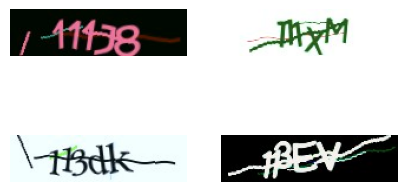

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import cv2 # Import cv2 for image operations

# Path to the data directory
# Correcting the path to point to the actual image samples within the downloaded dataset
data_dir = Path(path)


# Get list of all the images
images = list(data_dir.glob("*.jpg")) # Changed to .jpg as per inspection
print("Number of images found: ", len(images))


# Let's take a look at some samples first.
# Always look at your data!
sample_images = images[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

In [ ]:
import os

# List contents of the downloaded dataset path to identify the correct image directory
print(f"Contents of {path}:")
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        if f.endswith('.png') or f.endswith('.jpg'): # Only show image files or a few general files for brevity
            print(f'{subindent}{f}')
        elif len(files) > 5 and files.index(f) == 5:
            print(f'{subindent}...')
            break


Contents of C:\Users\spark\.cache\kagglehub\datasets\parsasam\captcha-dataset\versions\1:
1/
    111J8.jpg
    111XM.jpg
    113dk.jpg
    113EV.jpg
    113sB.jpg
    114ty.jpg
    115rB.jpg
    116gw.jpg
    116OC.jpg
    119bg.jpg
    11AvS.jpg
    11AWu.jpg
    11bav.jpg
    11Cbx.jpg
    11CgC.jpg
    11D8l.jpg
    11DXU.jpg
    11EB7.jpg
    11ePd.jpg
    11ePW.jpg
    11FI9.jpg
    11g54.jpg
    11GdB.jpg
    11gIZ.jpg
    11Iwb.jpg
    11kL8.jpg
    11lOX.jpg
    11nW8.jpg
    11OTg.jpg
    11OUZ.jpg
    11pDK.jpg
    11q3M.jpg
    11rbg.jpg
    11RKd.jpg
    11rqV.jpg
    11rUA.jpg
    11U9a.jpg
    11uyC.jpg
    11VFv.jpg
    11Vmh.jpg
    11xqY.jpg
    11XrW.jpg
    11Ydw.jpg
    11YpK.jpg
    11Zch.jpg
    11zhw.jpg
    11ZJB.jpg
    11zkc.jpg
    125un.jpg
    12Agx.jpg
    12cgs.jpg
    12E8r.jpg
    12fk4.jpg
    12gWd.jpg
    12Gyu.jpg
    12iis.jpg
    12JXR.jpg
    12KzM.jpg
    12Lgp.jpg
    12LsN.jpg
    12m3v.jpg
    12MEk.jpg
    12NuE.jpg
    12OJ9.jpg
    12Q9a.j

In [ ]:
# Store all the characters in a set
characters = set()

# A list to store the length of each captcha
captcha_length = []

# Store image-label info
dataset = []

# Iterate over the dataset and store the
# information needed
for img_path in images:
    # 1. Get the label associated with each image
    label = img_path.name.split(".jpg")[0] # Changed to .jpg
    # 2. Store the length of this cpatcha
    captcha_length.append(len(label))
    # 3. Store the image-label pair info
    dataset.append((str(img_path), label))

    # 4. Store the characters present
    for ch in label:
        characters.add(ch)

# Sort the characters
characters = sorted(characters)

# Convert the dataset info into a dataframe
dataset = pd.DataFrame(dataset, columns=["img_path", "label"], index=None)

# Shuffle the dataset
dataset = dataset.sample(frac=1.).reset_index(drop=True)


print("Number of unqiue charcaters in the whole dataset: ", len(characters))
print("Maximum length of any captcha: ", max(Counter(captcha_length).keys()))
print("Characters present: ", characters)
print("Total number of samples in the dataset: ", len(dataset))
dataset.head()

Number of unqiue charcaters in the whole dataset:  60
Maximum length of any captcha:  5
Characters present:  ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total number of samples in the dataset:  113062


img_path  label
0  C:\Users\spark\.cache\kagglehub\datasets\parsa...  jPwKO
1  C:\Users\spark\.cache\kagglehub\datasets\parsa...  ZKseG
2  C:\Users\spark\.cache\kagglehub\datasets\parsa...  va9TM
3  C:\Users\spark\.cache\kagglehub\datasets\parsa...  QaQnM
4  C:\Users\spark\.cache\kagglehub\datasets\parsa...  SdMXl

In [ ]:
# Split the dataset into training and validation sets
training_data, validation_data = train_test_split(dataset, test_size=0.1, random_state=seed)

training_data = training_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)

print("Number of training samples: ", len(training_data))
print("Number of validation samples: ", len(validation_data))



# Map text to numeric labels
char_to_labels = {char:idx for idx, char in enumerate(characters)}

# Map numeric labels to text
labels_to_char = {val:key for key, val in char_to_labels.items()}



# Sanity check for corrupted images
def is_valid_captcha(captcha):
    for ch in captcha:
        if not ch in characters:
            return False
    return True



# Store arrays in memory as it's not a muvh big dataset
def generate_arrays(df, resize=True, img_height=50, img_width=200):
    """Generates image array and labels array from a dataframe.

    Args:
        df: dataframe from which we want to read the data
        resize (bool)    : whether to resize images or not
        img_weidth (int): width of the resized images
        img_height (int): height of the resized images

    Returns:
        images (ndarray): grayscale images
        labels (ndarray): corresponding encoded labels
    """

    num_items = len(df)
    images = np.zeros((num_items, img_height, img_width), dtype=np.float32)
    labels = [0]*num_items

    for i in range(num_items):
        img = cv2.imread(df["img_path"][i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        if resize:
            img = cv2.resize(img, (img_width, img_height))

        img = (img/255.).astype(np.float32)
        label = df["label"][i]

        # Add only if it is a valid captcha
        if is_valid_captcha(label):
            images[i, :, :] = img
            labels[i] = label

    return images, np.array(labels)


# NOTE: Building the numpy arrays (images/labels) is done AFTER subsampling
# so we don't overwrite the DataFrame variables used for sampling.


Number of training samples:  101755
Number of validation samples:  11307


In [ ]:
# ========== DATA REDUCTION FOR FASTER TRAINING ==========
# Subsample the dataset for faster training
# Adjust the fraction below based on your preferences:
# 0.2 = 20% (very fast, ~5-10 mins)
# 0.5 = 50% (fast, ~15-20 mins)
# 1.0 = 100% (full dataset, slow)

SUBSAMPLE_FRACTION = 0.5  # <-- CHANGE THIS VALUE TO REDUCE DATA

training_data = training_data.sample(frac=SUBSAMPLE_FRACTION, random_state=seed).reset_index(drop=True)
validation_data = validation_data.sample(frac=SUBSAMPLE_FRACTION, random_state=seed).reset_index(drop=True)

print(f"Training data reduced to: {len(training_data)} samples ({SUBSAMPLE_FRACTION*100}%)")
print(f"Validation data reduced to: {len(validation_data)} samples ({SUBSAMPLE_FRACTION*100}%)")


Training data reduced to: 50878 samples (50.0%)
Validation data reduced to: 5654 samples (50.0%)


In [ ]:
# Build training/validation arrays AFTER subsampling
training_images, training_labels = generate_arrays(df=training_data)
print("Number of training images: ", training_images.shape)
print("Number of training labels: ", training_labels.shape)

validation_images, validation_labels = generate_arrays(df=validation_data)
print("Number of validation images: ", validation_images.shape)
print("Number of validation labels: ", validation_labels.shape)


Number of training images:  (50878, 50, 200)
Number of training labels:  (50878,)
Number of validation images:  (5654, 50, 200)
Number of validation labels:  (5654,)
Number of validation images:  (5654, 50, 200)
Number of validation labels:  (5654,)


In [ ]:
class DataGenerator(keras.utils.Sequence):
    """Generates batches from a given dataset.

    Args:
        data: training or validation data
        labels: corresponding labels
        char_map: dictionary mapping char to labels
        batch_size: size of a single batch
        img_width: width of the resized
        img_height: height of the resized
        downsample_factor: by what factor did the CNN downsample the images
        max_length: maximum length of any captcha
        shuffle: whether to shuffle data or not after each epoch
    Returns:
        batch_inputs: a dictionary containing batch inputs
        batch_labels: a batch of corresponding labels
    """

    def __init__(self,
                 data,
                 labels,
                 char_map,
                 batch_size=16,
                 img_width=200,
                 img_height=50,
                 downsample_factor=4,
                 max_length=5,
                 shuffle=True
                ):
        self.data = data
        self.labels = labels
        self.char_map = char_map
        self.batch_size = batch_size
        self.img_width = img_width
        self.img_height = img_height
        self.downsample_factor = downsample_factor
        self.max_length = max_length
        self.shuffle = shuffle
        self.indices = np.arange(len(data))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))

    def __getitem__(self, idx):
        # 1. Get the next batch indices
        curr_batch_idx = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]

        # 2. This isn't necessary but it can help us save some memory
        # as not all batches the last batch may not have elements
        # equal to the batch_size
        batch_len = len(curr_batch_idx)

        # 3. Instantiate batch arrays
        batch_images = np.ones((batch_len, self.img_width, self.img_height, 1),
                               dtype=np.float32)
        batch_labels = np.ones((batch_len, self.max_length), dtype=np.float32)
        input_length = np.ones((batch_len, 1), dtype=np.int64) * \
                                (self.img_width // self.downsample_factor - 2)
        label_length = np.zeros((batch_len, 1), dtype=np.int64)


        for j, idx in enumerate(curr_batch_idx):
            # 1. Get the image and transpose it
            img = self.data[idx].T
            # 2. Add extra dimenison
            img = np.expand_dims(img, axis=-1)
            # 3. Get the correpsonding label
            text = self.labels[idx]
            # 4. Include the pair only if the captcha is valid
            if is_valid_captcha(text):
                label = [self.char_map[ch] for ch in text]
                batch_images[j] = img
                batch_labels[j] = label
                label_length[j] = len(text)

        batch_inputs = {
                'input_data': batch_images,
                'input_label': batch_labels,
                'input_length': input_length,
                'label_length': label_length,
                }
        return batch_inputs, np.zeros(batch_len).astype(np.float32)


    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

In [ ]:
# Batch size for training and validation
batch_size = 32  # Increased from 16 for faster training

# Desired image dimensions
img_width=200
img_height=50

# Factor  by which the image is going to be downsampled
# by the convolutional blocks
downsample_factor=4

# Maximum length of any captcha
max_length=5

# Get a generator object for the training data
# NOTE: pass the numpy arrays built after subsampling
train_data_generator = DataGenerator(data=training_images,
                                     labels=training_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=True
                                    )

# Get a generator object for the validation data
valid_data_generator = DataGenerator(data=validation_images,
                                     labels=validation_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=False
                                    )


In [ ]:
# ========== TRAINING OPTIMIZATION SETTINGS ==========
# Increase batch size for faster training (but keep reasonable for GPU memory)
# Larger batch = faster training but may reduce accuracy slightly
# Smaller batch = slower training but potentially better accuracy

BATCH_SIZE_OPTIMIZED = 32  # <-- Increase from 16 to 32 for faster training
EPOCHS_OPTIMIZED = 30      # <-- Reduce from 50 to 30 (early stopping will kick in anyway)

print(f"Optimized settings:")
print(f"  Batch size: {BATCH_SIZE_OPTIMIZED} (was {batch_size})")
print(f"  Max epochs: {EPOCHS_OPTIMIZED}")
print(f"  Estimated training time: {EPOCHS_OPTIMIZED * len(training_data) / BATCH_SIZE_OPTIMIZED / 100:.1f} minutes")


Optimized settings:
  Batch size: 32 (was 32)
  Max epochs: 30
  Estimated training time: 477.0 minutes


In [ ]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred, input_length, label_length):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # On test time, just return the computed loss
        return loss



def build_model():
    # Inputs to the model
    input_img = layers.Input(shape=(img_width, img_height, 1),
                            name='input_data',
                            dtype='float32')
    labels = layers.Input(name='input_label', shape=[max_length], dtype='float32')
    input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
    label_length = layers.Input(name='label_length', shape=[1], dtype='int64')

    # First conv block
    x = layers.Conv2D(32,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv1')(input_img)
    x = layers.MaxPooling2D((2,2), name='pool1')(x)

    # Second conv block
    x = layers.Conv2D(64,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv2')(x)
    x = layers.MaxPooling2D((2,2), name='pool2')(x)

    # We have used two max pool with pool size and strides of 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing it to RNNs
    new_shape = ((img_width // 4), (img_height // 4)*64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128,
                                         return_sequences=True,
                                         dropout=0.2))(x)
    x = layers.Bidirectional(layers.LSTM(64,
                                         return_sequences=True,
                                         dropout=0.25))(x)

    # Predictions
    x = layers.Dense(len(characters)+1,
              activation='softmax',
              name='dense2',
              kernel_initializer='he_normal')(x)

    # Calculate CTC
    output = CTCLayer(name='ctc_loss')(labels, x, input_length, label_length)

    # Define the model
    model = keras.models.Model(inputs=[input_img,
                                       labels,
                                       input_length,
                                       label_length],
                                outputs=output,
                                name='ocr_model_v1')

    # Optimizer
    sgd = keras.optimizers.SGD(learning_rate=0.002,
                               decay=1e-6,
                               momentum=0.9,
                               nesterov=True,
                               clipnorm=5)

    # Compile the model and return
    model.compile(optimizer=sgd)
    return model

In [ ]:
model = build_model()
model.summary()

c:\Users\spark\CAPTCHA PRO\Wirtual\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "ocr_model_v1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_data          │ (None, 200, 50,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 200, 50,   │        320 │ input_data[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 100, 25,   │          0 │ Conv1[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2 (Conv2D)      │ (None, 100, 25,   │     18,496 │ pool1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool2               │ (None, 50, 12,    │          0 │ Conv2[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 50, 768)   │          0 │ pool2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense1 (Dense)      │ (None, 50, 64)    │     49,216 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 50, 64)    │          0 │ dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 50, 256)   │    197,632 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 50, 128)   │    164,352 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_label         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense2 (Dense)      │ (None, 50, 61)    │      7,869 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_length        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label_length        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ctc_loss (CTCLayer) │ (None, 1)         │          0 │ input_label[0][0… │
│                     │                   │            │ dense2[0][0],     │
│                     │                   │            │ input_length[0][… │
│                     │                   │            │ label_length[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 437,885 (1.67 MB)

 Trainable params: 437,885 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Add early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   patience=5,
                                   restore_best_weights=True)

# Train the model with optimized settings
history = model.fit(train_data_generator,
                    validation_data=valid_data_generator,
                    epochs=30,  # Reduced from 50
                    callbacks=[es])


Epoch 1/30


c:\Users\spark\CAPTCHA PRO\Wirtual\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1590/1590 ━━━━━━━━━━━━━━━━━━━━ 218s 134ms/step - loss: 693.3055 - val_loss: 668.5797
Epoch 2/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 218s 134ms/step - loss: 693.3055 - val_loss: 668.5797
Epoch 2/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 326s 175ms/step - loss: 645.4433 - val_loss: 613.7417
Epoch 3/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 326s 175ms/step - loss: 645.4433 - val_loss: 613.7417
Epoch 3/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 188s 118ms/step - loss: 590.6196 - val_loss: 554.2973
Epoch 4/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 188s 118ms/step - loss: 590.6196 - val_loss: 554.2973
Epoch 4/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 459s 289ms/step - loss: 539.9130 - val_loss: 502.3946
Epoch 5/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 459s 289ms/step - loss: 539.9130 - val_loss: 502.3946
Epoch 5/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 296s 159ms/step - loss: 496.7141 - val_loss: 463.5303
Epoch 6/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 296s 159ms/step - loss: 496.7141 - val_loss: 463.5303
Epoch 6/30
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 293s 185m

In [ ]:
# Build prediction model: takes only image input, outputs character predictions
prediction_model = keras.models.Model(
    inputs=model.get_layer(name='input_data').output,
    outputs=model.get_layer(name='dense2').output
)
prediction_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_data (InputLayer)         │ (None, 200, 50, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 200, 50, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 100, 25, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 100, 25, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 50, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 50, 768)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 50, 64)         │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 256)        │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 50, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 50, 61)         │         7,869 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,885 (1.67 MB)

 Trainable params: 437,885 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# A utility to decode the output of the network
def decode_batch_predictions(pred):
    pred = pred[:, :-2]
    input_len = np.ones(pred.shape[0])*pred.shape[1]

    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred,
                                        input_length=input_len,
                                        greedy=True)[0][0]

    # Iterate over the results and get back the text
    output_text = []
    for res in results.numpy():
        outstr = ''
        for c in res:
            if c < len(characters) and c >=0:
                outstr += labels_to_char[c]
        output_text.append(outstr)

    # return final text results
    return output_text

In [ ]:
#  Let's check results on some validation samples
for p, (inp_value, _) in enumerate(valid_data_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']
    labels = inp_value['input_label']

    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)


    orig_texts = []
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        orig_texts.append(text)

    for i in range(bs):
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
Ground truth: ny4V8 	 Predicted: ny4V8
Ground truth: yVRSv 	 Predicted: yVRSv
Ground truth: jArUG 	 Predicted: jArUG
Ground truth: BUi7l 	 Predicted: BUi71
Ground truth: hWpI9 	 Predicted: hWpl9
Ground truth: YF3P1 	 Predicted: Yf3P1
Ground truth: zV6Tv 	 Predicted: zV61V
Ground truth: yxLkD 	 Predicted: YxLkD
Ground truth: Ln6cL 	 Predicted: Ln6cL
Ground truth: 6TtmW 	 Predicted: 6TtmW
Ground truth: jH2Sc 	 Predicted: jH2Se
Ground truth: wzRHI 	 Predicted: WZPHI
Ground truth: OZu5i 	 Predicted: OZu5i
Ground truth: lXYit 	 Predicted: lXYht
Ground truth: Xh9bT 	 Predicted: Xh9bT
Ground truth: 2x689 	 Predicted: 2x689
Ground truth: 41pfz 	 Predicted: 4NpfZ
Ground truth: OQLK5 	 Predicted: OLk5
Ground truth: zZYfE 	 Predicted: zZYfE
Ground truth: ws7G1 	 Predicted: w67GT
Ground truth: MatTz 	 Predicted: M4utz
Ground truth: JQ5LJ 	 Predicted: JQ5tJ
Ground truth: 1YaQ4 	 Predicted: IYaO4
Ground truth: KXkZR 	 Pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Ground truth: ny4V8 	 Predicted: ny4V8
Ground truth: yVRSv 	 Predicted: yVRSv
Ground truth: jArUG 	 Predicted: jArUG
Ground truth: BUi7l 	 Predicted: BUi71
Ground truth: hWpI9 	 Predicted: hWpl9
Ground truth: YF3P1 	 Predicted: Yf3P1
Ground truth: zV6Tv 	 Predicted: zV61V
Ground truth: yxLkD 	 Predicted: YxLkD
Ground truth: Ln6cL 	 Predicted: Ln6cL
Ground truth: 6TtmW 	 Predicted: 6TtmW
Ground truth: jH2Sc 	 Predicted: jH2Se
Ground truth: wzRHI 	 Predicted: WZPHI
Ground truth: OZu5i 	 Predicted: OZu5i
Ground truth: lXYit 	 Predicted: lXYht
Ground truth: Xh9bT 	 Predicted: Xh9bT
Ground truth: 2x689 	 Predicted: 2x689
Ground truth: 41pfz 	 Predicted: 4NpfZ
Ground truth: OQLK5 	 Predicted: OLk5
Ground truth: zZYfE 	 Predicted: zZYfE
Ground truth: ws7G1 	 Predicted: w67GT
Ground truth: MatTz 	 Predicted: M4utz
Ground truth: JQ5LJ 	 Predicted: JQ5tJ
Ground truth: 1YaQ4 	 Predicted: IYaO4
Ground truth: ny4V8 	 Predic

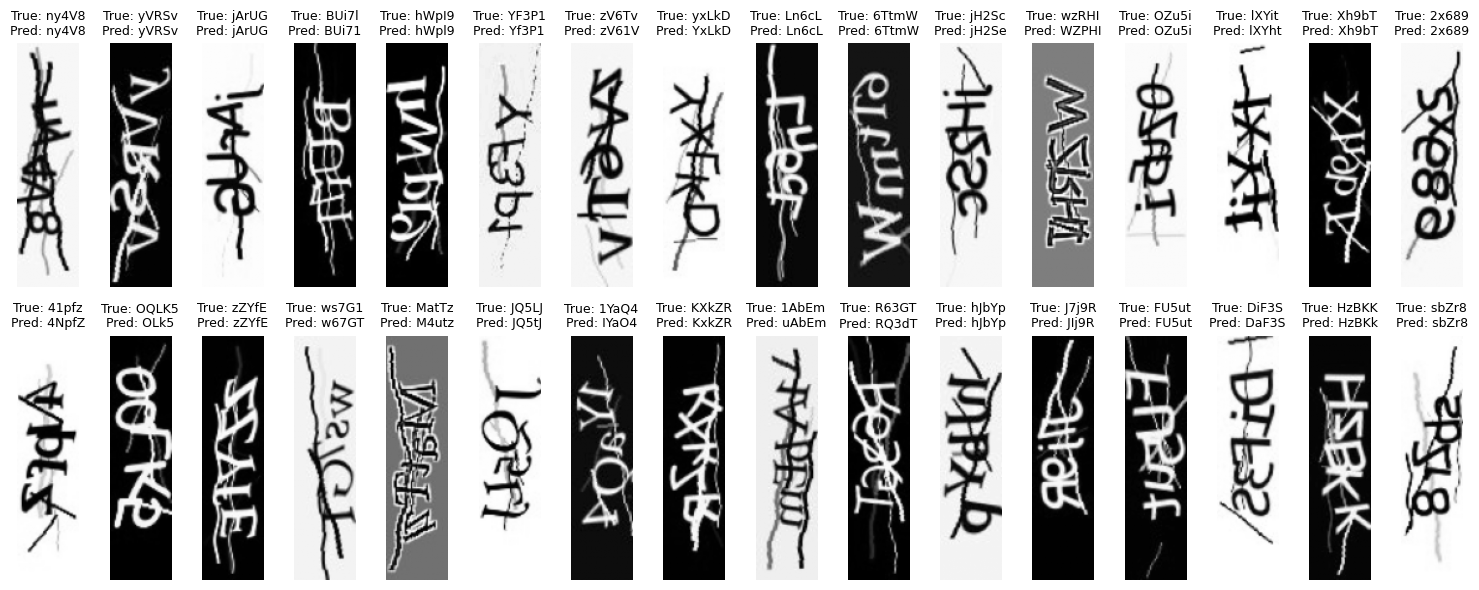

In [ ]:
import matplotlib.pyplot as plt

# Doğrulama verilerinden ilk batch'i al
for p, (inp_value, _) in enumerate(valid_data_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']  # (batch, 50, 200, 1)
    labels = inp_value['input_label']  # ground truth label dizileri

    # Tahmin yap
    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)

    # Gerçek etiketleri karaktere çevir
    orig_texts = []
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        orig_texts.append(text)

    # Görselleştir
    plt.figure(figsize=(15, 6))
    for i in range(bs):
        img = X_data[i].squeeze()  # (50, 200)
        ax = plt.subplot(2, (bs + 1) // 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'True: {orig_texts[i]}\nPred: {pred_texts[i]}', fontsize=9)
        plt.axis('off')
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')

    plt.tight_layout()
    plt.show()
    break  # sadece bir batch göster

In [ ]:
model.save("captcha_train_model.keras")
prediction_model.save("captcha_inference_model.keras")


In [ ]:
def evaluate_model(generator, steps=10):
    total_chars = 0
    correct_chars = 0
    total_words = 0
    correct_words = 0

    for step, (inp, _) in enumerate(generator):
        if step == steps:
            break

        X = inp["input_data"]
        y_true = inp["input_label"]

        preds = prediction_model.predict(X)
        pred_texts = decode_batch_predictions(preds)

        true_texts = []
        for label in y_true:
            text = ''.join([labels_to_char[int(x)] for x in label])
            true_texts.append(text)

        for t, p in zip(true_texts, pred_texts):
            total_words += 1
            if t == p:
                correct_words += 1

            for tc, pc in zip(t, p):
                total_chars += 1
                if tc == pc:
                    correct_chars += 1

    word_acc = (correct_words / total_words) * 100
    char_acc = (correct_chars / total_chars) * 100

    return word_acc, char_acc


In [ ]:
train_word_acc, train_char_acc = evaluate_model(train_data_generator)
print("Train Word Accuracy:", train_word_acc)
print("Train Character Accuracy:", train_char_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Train Word Accuracy: 33.4375
Train Character Accuracy: 77.61479591836735
Train Word Accuracy: 33.4375
Train Character Accuracy: 77.61479591836735


In [ ]:
test_word_acc, test_char_acc = evaluate_model(valid_data_generator)
print("Test Word Accuracy:", test_word_acc)
print("Test Character Accuracy:", test_char_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Test Word Accuracy: 36.5625
Test Character Accuracy: 77.6015228426396
Test Word Accuracy: 36.5625
Test Character Accuracy: 77.6015228426396


In [ ]:
from sklearn.metrics import f1_score

y_true_all = []
y_pred_all = []

for inp, _ in valid_data_generator:
    X = inp["input_data"]
    y_true = inp["input_label"]

    preds = prediction_model.predict(X)
    pred_texts = decode_batch_predictions(preds)

    for t, p in zip(y_true, pred_texts):
        true_chars = [labels_to_char[int(x)] for x in t]
        pred_chars = list(p)

        for tc, pc in zip(true_chars, pred_chars):
            y_true_all.append(tc)
            y_pred_all.append(pc)

f1 = f1_score(y_true_all, y_pred_all, average="macro")
print("Character-Level F1 Score:", f1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

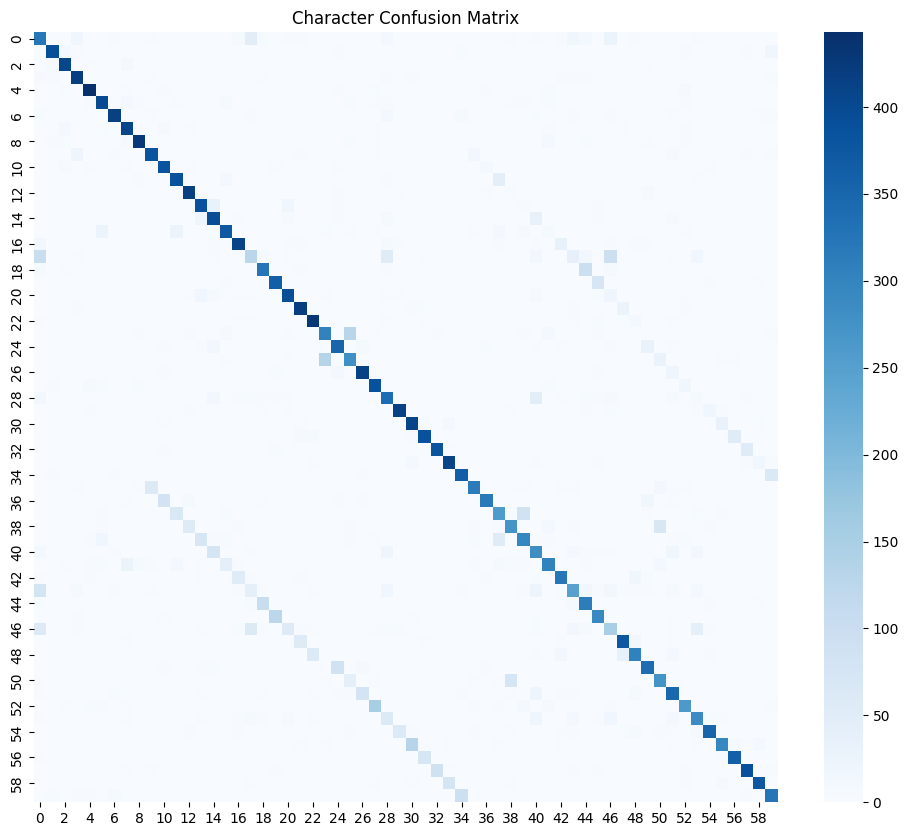

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_all, y_pred_all)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues")
plt.title("Character Confusion Matrix")
plt.show()


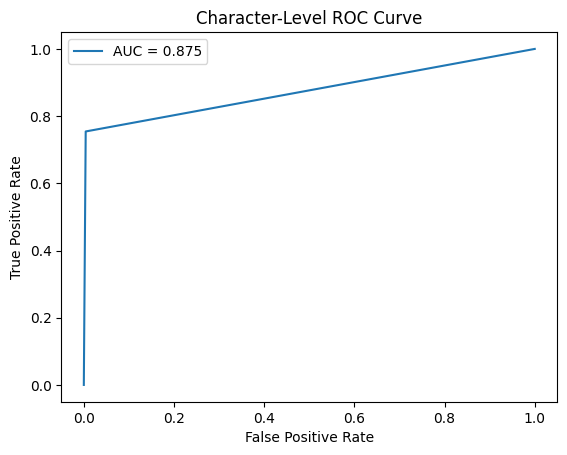

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

classes = characters
y_true_bin = label_binarize(y_true_all, classes=classes)
y_pred_bin = label_binarize(y_pred_all, classes=classes)

fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Character-Level ROC Curve")
plt.legend()
plt.show()
